In [1]:
import numpy as np
import pandas as pd
import sys
!{sys.executable} -m pip install pandas_datareader
import pandas_datareader.data as web
import datetime as dt

You should consider upgrading via the 'C:\Users\rache\OneDrive\Desktop\CFRM\521\code\my_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!{sys.executable} -m pip install pyti
import technical_analysis as ta
import decision_profit as dp
import process_data as proc
import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the 'C:\Users\rache\OneDrive\Desktop\CFRM\521\code\my_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
tickers = ['^GSPC', '^BSESN']
names = ['S&P 500', 'BSE SENSEX']
dfs = proc.get_process_df(tickers)
X_trains, X_tests, y_trains, y_tests, dfs_train, dfs_test = proc.get_train_test(dfs)
X_train_subs, X_vals, y_train_subs, y_vals, dfs_train_sub, dfs_val = proc.get_train_val(dfs_train, X_trains, y_trains)

In [4]:
# storing total extra profits achieved by each model
extra_profit_untuned = {}
extra_profit_msetune = {}
extra_profit_protune = {}

## Using default parameters
<h3> random forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

models = []
for i in range(len(tickers)):
    models.append(RandomForestRegressor(random_state=42))

# train and training set summary
dp.train_and_summary(models, names, dfs_train, X_trains, y_trains)

Training set
S&P 500
number of trading positions taken with actual trend: 30
number of trading positions taken with predicted trend: 156
BSE SENSEX
number of trading positions taken with actual trend: 38
number of trading positions taken with predicted trend: 158
Training set
S&P 500
profit with actual trend: 40.402841277066365
profit with predicted trend: 81.99731466666258
BSE SENSEX
profit with actual trend: 12.228547748628062
profit with predicted trend: 41.06120909412128
average MSE: 0.004433995833055241


In [7]:
# test set summary
dp.test_summary(models, names, 'SVR', dfs_test, X_tests, y_tests, extra_profit_untuned, mse=True)

Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 27
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 13.56556191136102
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE SVR 0.21086585662855972


<h3> extra trees

In [6]:
from sklearn.ensemble import ExtraTreesRegressor

models = []
for i in range(len(tickers)):
    models.append(ExtraTreesRegressor(random_state=42))
    
# train and train set summary
dp.train_and_summary(models, names, dfs_train, X_trains, y_trains)

Training set
S&P 500
number of trading positions taken with actual trend: 30
number of trading positions taken with predicted trend: 164
BSE SENSEX
number of trading positions taken with actual trend: 38
number of trading positions taken with predicted trend: 156
Training set
S&P 500
profit with actual trend: 40.402841277066365
profit with predicted trend: 83.91009455384443
BSE SENSEX
profit with actual trend: 12.228547748628062
profit with predicted trend: 38.22902198916485
average MSE: 1.1498493447675733e-31


In [9]:
dp.test_summary(models, names, 'ET', dfs_test, X_tests, y_tests, extra_profit_untuned, mse=True)

Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 27
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 13.56556191136102
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE ET 0.21997458535406572


In [7]:
from sklearn.ensemble import AdaBoostRegressor

models = []
for i in range(len(tickers)):
    models.append(AdaBoostRegressor(random_state=42))
    
# train and train set summary
dp.train_and_summary(models, names, dfs_train, X_trains, y_trains)

Training set
S&P 500
number of trading positions taken with actual trend: 30
number of trading positions taken with predicted trend: 98
BSE SENSEX
number of trading positions taken with actual trend: 38
number of trading positions taken with predicted trend: 68
Training set
S&P 500
profit with actual trend: 40.402841277066365
profit with predicted trend: 97.48564553002242
BSE SENSEX
profit with actual trend: 12.228547748628062
profit with predicted trend: 72.63793993554006
average MSE: 0.030808483158211136


In [13]:
dp.test_summary(models, names, 'Adaboost', dfs_test, X_tests, y_tests, extra_profit_untuned, mse=True)

Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 27
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 13.56556191136102
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE Adaboost 0.19760798806667654


In [8]:
from xgboost import XGBRegressor

models = []
for i in range(len(tickers)):
    models.append(XGBRegressor(random_state=42))

# train and train set summary
dp.train_and_summary(models, names, dfs_train, X_trains, y_trains)

Training set
S&P 500
number of trading positions taken with actual trend: 30
number of trading positions taken with predicted trend: 160
BSE SENSEX
number of trading positions taken with actual trend: 38
number of trading positions taken with predicted trend: 154
Training set
S&P 500
profit with actual trend: 40.402841277066365
profit with predicted trend: 80.81343661486152
BSE SENSEX
profit with actual trend: 12.228547748628062
profit with predicted trend: 39.29730402960933
average MSE: 0.0002921857807101411


In [15]:
dp.test_summary(models, names, 'Gradient boost', dfs_test, X_tests, y_tests, extra_profit_untuned, mse=True)

Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 29
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 39
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 14.479827631999376
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 25.21993452333526
Average MSE Gradient boost 0.23807278308246013


In [16]:
extra_profit_untuned

{'SVR': 7.488206028849294,
 'ET': 7.488206028849294,
 'Adaboost': 7.488206028849294,
 'Gradient boost': 5.2553446512804936}

## Tuned parameters
<h3> using MSE
<h3>Random forest regressor</h3>

In [23]:
from scipy.stats import randint
from itertools import product

boots = [True, False]
ns = randint.rvs(low=50, high=150, size=20, random_state=42)
max_features = randint.rvs(low=1, high=7, size=7, random_state=42)

parameters = [ns, max_features, boots]

param_list = list(product(*parameters))
best_params_rf = []

for i in range(len(tickers)):
    best_param = []
    best_score = np.inf
    for param in param_list:
        rf = RandomForestRegressor(n_estimators=param[0], max_features=param[1], bootstrap=param[2], random_state=42)
        score = dp.cv_mse(rf, i, X_train_subs, y_train_subs, X_vals, y_vals)
        if score < best_score:
            best_score = score
            best_param = param
    best_params_rf.append(best_param)

print("random forest parameters that yields smallest MSE for each security:", best_params_rf)

random forest parameters that yields smallest MSE for each security: [(149, 5, True), (110, 5, True)]


In [19]:
best_params_rf = [(149, 5, True), (110, 5, True)]
best_models_rf = []
for i in range(len(tickers)):
    best_models_rf.append(RandomForestRegressor(n_estimators=best_params_rf[i][0], 
                                           max_features=best_params_rf[i][1],
                                           bootstrap=best_params_rf[i][2],
                                            random_state=42).fit(X_trains[i], y_trains[i]))
    
print("random forest results using the parameters that yields the lowest MSE")
dp.test_summary(best_models_rf, names, 'RF', dfs_test, X_tests, y_tests, extra_profit_msetune, mse=True)   

random forest results using the parameters that yields the lowest MSE
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 27
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 13.56556191136102
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE RF 0.21094665396036832


In [25]:
best_params_et = []

for i in range(len(tickers)):
    best_param = []
    best_score = np.inf
    for param in param_list:
        et = ExtraTreesRegressor(n_estimators=param[0], max_features=param[1], bootstrap=param[2], random_state=42)
        score = dp.cv_mse(et, i, X_train_subs, y_train_subs, X_vals, y_vals)
        if score < best_score:
            best_score = score
            best_param = param
    best_params_et.append(best_param)
    
print("extra trees parameters that yields smallest MSE for each security:", best_params_et)

extra trees parameters that yields smallest MSE for each security: [(149, 5, True), (136, 4, True)]


In [22]:
best_params_et = [(149, 5, True), (136, 4, True)]
best_models_et = []

for i in range(len(tickers)):
    best_models_et.append(ExtraTreesRegressor(n_estimators=best_params_et[i][0], 
                                           max_features=best_params_et[i][1],
                                           bootstrap=best_params_et[i][2],
                                         random_state=42).fit(X_trains[i], y_trains[i]))
    
print("extra trees results using the parameters that yields the lowest MSE")
dp.test_summary(best_models_et, names, 'ET', dfs_test, X_tests, y_tests, extra_profit_msetune, mse=True)   

extra trees results using the parameters that yields the lowest MSE
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 27
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 13.56556191136102
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE ET 0.20688991418112407


In [28]:
loss = ['linear', 'square', 'exponential']
ns = randint.rvs(low=30, high=120, size=20, random_state=42)
parameters = [ns, loss]
param_list = list(product(*parameters))
best_params_ab = []

for i in range(len(tickers)):
    best_param = []
    best_score = np.inf
    for param in param_list:
        ab = AdaBoostRegressor(n_estimators=param[0], loss=param[1], random_state=42)
        score = dp.cv_mse(ab, i, X_train_subs, y_train_subs, X_vals, y_vals)
        if score < best_score:
            best_score = score
            best_param = param
    best_params_ab.append(best_param)

print("adaboost parameters that yields smallest MSE for each security:", best_params_ab)

adaboost parameters that yields smallest MSE for each security: [(81, 'linear'), (81, 'linear')]


In [31]:
best_params_ab = [(81, 'linear'), (81, 'linear')]
best_models_ab = []

for i in range(len(tickers)):
    best_models_ab.append(AdaBoostRegressor(n_estimators=best_params_ab[i][0], 
                                            loss=best_params_ab[i][1], random_state=42).fit(X_trains[i], y_trains[i]))

print("adaboost results using the parameters that yields the lowest MSE")
dp.test_summary(best_models_ab, names, 'adaboost', dfs_test, X_tests, y_tests, extra_profit_msetune, mse=True)   

adaboost results using the parameters that yields the lowest MSE
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 27
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 13.56556191136102
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE adaboost 0.19760798806667654


In [43]:
max_depths = np.arange(2, 8)
ns = randint.rvs(low=30, high=120, size=20, random_state=42)

parameters = [ns, max_depths]
param_list = list(product(*parameters))
best_params_xgb = []

for i in range(len(tickers)):
    best_param = []
    best_score = np.inf
    for param in param_list:
        xgb = XGBRegressor(n_estimators=param[0], max_depths=param[1], random_state=42)
        score = 0
        for j in range(len(X_train_subs[i])):
            xgb.fit(X_train_subs[j][i], y_train_subs[j][i])
            y_pred = xgb.predict(X_vals[i][j])
            score += np.sqrt(mean_squared_error(y_pred, y_vals[j][i]))

        if score < best_score:
            best_score = score
            best_param = param
    best_params_xgb.append(best_param)

[20:35:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[20:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

In [44]:
print("gradient boost parameters that yields smallest MSE for each security:", best_params_xgb)

[(31, 2), (31, 2)]


In [32]:
best_params_xgb = [(31, 2), (31, 2)]
best_models_xgb = []

for i in range(len(tickers)):
    best_models_xgb.append(XGBRegressor(n_estimators=best_params_xgb[i][0], 
                                        max_depth=best_params_xgb[i][1], random_state=42).fit(X_trains[i], y_trains[i]))

print("gradient boost results using the parameters that yields the lowest MSE")
dp.test_summary(best_models_xgb, names, 'Gradient boost', dfs_test, X_tests, y_tests, extra_profit_msetune, mse=True)   

gradient boost results using the parameters that yields the lowest MSE
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 29
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 14.479827631999376
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE Gradient boost 0.20655212146186272


In [33]:
extra_profit_msetune

{'RF': 7.488206028849294,
 'ET': 7.488206028849294,
 'adaboost': 7.488206028849294,
 'Gradient boost': 8.40247174948765}

<h3> find best parameters using profit

In [35]:
best_params_rf1 = []

for i in range(len(tickers)):
    best_profit = 0
    for param in param_list:
        rf = RandomForestRegressor(n_estimators=param[0], max_features=param[1], bootstrap=param[2], random_state=42)
        profit = dp.cv_profit(rf, i, dfs_train_sub, dfs_val, X_train_subs, y_train_subs, X_vals, y_vals)
        if profit > best_profit:
            best_profit = profit
            best_param = param
    best_params_rf1.append(best_param)

print("random forest parameters that yield the highest profit on each security:", best_params_rf1)

random forest parameters that yield the highest profit on each security: [(70, 2, False), (149, 4, True)]


In [38]:
best_models_rf1 = []

for i in range(len(tickers)):
    best_models_rf1.append(RandomForestRegressor(n_estimators=best_params_rf1[i][0], 
                                           max_features=best_params_rf1[i][1],
                                           bootstrap=best_params_rf1[i][2],
                                            random_state=42).fit(X_trains[i], y_trains[i]))

print("random forest results using the parameters that yields the highest profit")
dp.test_summary(best_models_rf1, names, 'RF', dfs_test, X_tests, y_tests, extra_profit_protune, mse=True)

random forest results using the parameters that yields the highest profit
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 27
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 13.56556191136102
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE RF 0.21778220572377022


In [39]:
best_params_et1 = []

for i in range(len(tickers)):
    best_profit = 0
    for param in param_list:
        et = ExtraTreesRegressor(n_estimators=param[0], max_features=param[1], bootstrap=param[2], random_state=42)
        profit = dp.cv_profit(et, i, dfs_train_sub, dfs_val, X_train_subs, y_train_subs, X_vals, y_vals)
        if profit > best_profit:
            best_profit = profit
            best_param = param
    best_params_et1.append(best_param)
    
print("extra trees parameters that yield the highest profit on each security:", best_params_et1)

extra trees parameters that yield the highest profit on each security: [(110, 3, True), (64, 2, True)]


In [40]:
best_models_et1 = []
for i in range(len(tickers)):
    best_models_et1.append(RandomForestRegressor(n_estimators=best_params_et1[i][0], 
                                           max_features=best_params_et1[i][1],
                                           bootstrap=best_params_et1[i][2],
                                            random_state=42).fit(X_trains[i], y_trains[i]))

print("extra trees results using the parameters that yields the highest profit")
dp.test_summary(best_models_et1, names, 'ET', dfs_test, X_tests, y_tests, extra_profit_protune, mse=True)

extra trees results using the parameters that yields the highest profit
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 27
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 13.56556191136102
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE ET 0.21041604742785466


In [41]:
loss = ['linear', 'square', 'exponential']
ns = randint.rvs(low=30, high=120, size=20, random_state=42)
parameters = [ns, loss]
param_list = list(product(*parameters))
best_params_ab1 = []

for i in range(len(tickers)):
    best_profit = 0
    for param in param_list:
        ab = AdaBoostRegressor(n_estimators=param[0], loss=param[1], random_state=42)
        profit = dp.cv_profit(et, i, dfs_train_sub, dfs_val, X_train_subs, y_train_subs, X_vals, y_vals)
        if profit > best_profit:
            best_profit = profit
            best_param = param
    best_params_ab1.append(best_param)
    
print("adaboost parameters that yield the highest profit on each security:", best_params_ab1)

adaboost parameters that yield the highest profit on each security: [(81, 'linear'), (81, 'linear')]


In [45]:
best_models_ab1 = []
for i in range(len(tickers)):
    best_models_ab1.append(AdaBoostRegressor(n_estimators=best_params_ab1[i][0], 
                                            loss=best_params_ab1[i][1], random_state=42).fit(X_trains[i], y_trains[i]))

print("adaboost results using the parameters that yields the highest profit")
dp.test_summary(best_models_ab1, names, 'Adaboost', dfs_test, X_tests, y_tests, extra_profit_protune, mse=True)

adaboost results using the parameters that yields the highest profit
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 27
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 13.56556191136102
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE Adaboost 0.19760798806667654


In [28]:
max_depths = np.arange(2, 8)
ns = randint.rvs(low=30, high=120, size=20, random_state=42)

parameters = [ns, max_depths]
param_list = list(product(*parameters))
best_params_xgb1 = []

for i in range(len(tickers)):
    best_profit = 0
    for param in param_list:
        profit = 0
        for j in range(len(X_train_subs[i])):
            xgb = XGBRegressor(n_estimators=param[0], max_depths=param[1], random_state=42)
            actual_positions, predicted_positions = dp.get_positions([xgb], [dfs_train_sub[j][i]], [X_train_subs[j][i]], [y_train_subs[j][i]])
            actual_positions, predicted_positions = dp.get_positions([xgb], [dfs_val[j][i]], [X_vals[j][i]], training=False)
            dp.position_summary([names[i]], actual_positions, predicted_positions, [dfs_val[j][i]], printing=False, training=False)
            actual_profit, predicted_profit = dp.profit_summary([names[i]], [dfs_val[j][i]], printing=False, training=False)
            profit += np.sum(np.array(predicted_profit) - np.array(actual_profit))
        if profit > best_profit:
            best_profit = profit
            best_param = param
    best_params_xgb1.append(best_param)

[11:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[11:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

In [43]:
print("gradient boost parameters that yield the highest profit on each security:", best_params_xgb1)

gradient boost parameters that yield the highest profit on each security: [(81, 2), (81, 2)]


In [42]:
best_params_xgb1 = [(81, 2), (81, 2)]
best_models_xgb1 = []

for i in range(len(tickers)):
    best_models_xgb1.append(XGBRegressor(n_estimators=best_params_xgb1[i][0], 
                                        max_depth=best_params_xgb1[i][1], random_state=42).fit(X_trains[i], y_trains[i]))

print("gradient boost results using the parameters that yields the highest profit")
dp.test_summary(best_models_xgb1, names, 'Gradient boost', dfs_test, X_tests, y_tests, extra_profit_protune, mse=True)

gradient boost results using the parameters that yields the highest profit
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 29
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 22
Test set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 14.479827631999376
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 28.36706162154242
Average MSE Gradient boost 0.2185407703289428


In [46]:
extra_profit_protune

{'RF': 7.488206028849294,
 'ET': 7.488206028849294,
 'Gradient boost': 8.40247174948765,
 'Adaboost': 7.488206028849294}

not better than using MSE

## Blending the best of each category

<h3> models: SVR pipeline, KNN, Random Forest, Extra trees, Adaboost, Gradient Boost </h3>

<h3> using best models from error metrics

SVR, KNN: default model


In [9]:
def get_blender_trained(models, blender_choice=XGBRegressor(random_state=42)):
    cv_predicts = []
    sub_length = y_vals[0][0].shape[0]

    for i in range(len(X_train_subs[0])):
        cv_predict = np.zeros((sub_length * 5, len(models[i])))
        for j in range(len(X_train_subs)):
            for k in range(len(models[i])):
                models[i][k].fit(X_train_subs[j][i], y_train_subs[j][i])
                cv_predict[j * sub_length: (j+1) * sub_length, k] = models[i][k].predict(X_vals[j][i])
        cv_predicts.append(cv_predict)
    
    blenders = []
    y_blender_trains = [y_train[-sub_length * 5:] for y_train in y_trains]
    for i in range(len(tickers)):
        blender = blender_choice
        blender.fit(cv_predicts[i], y_blender_trains[i])
        blenders.append(blender)
    
    return blenders

def get_blender_output(models, blenders):
    otr_preds = []
    for i in range(len(tickers)):
        test_predict = np.zeros((len(y_tests[i]), len(models[i])))
        for j in range(len(models[i])):
            test_predict[:, j] = models[i][j].predict(X_tests[i])
        y_pred = blenders[i].predict(test_predict)
        otr_preds.append(y_pred)
    return otr_preds

In [10]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

models = []

best_params_rf = [(149, 5, True), (110, 5, True)]
best_params_et = [(149, 5, True), (136, 4, True)]
best_params_ab = [(81, 'linear'), (81, 'linear')]
best_params_xgb = [(81, 2), (81, 2)]

for i in range(len(tickers)):
    model = []
    model.append(Pipeline([('scaler', StandardScaler()), 
                        ('svr', SVR())]))
    model.append(Pipeline([('scaler', StandardScaler()), 
                        ('knn', KNeighborsRegressor())]))

    model.append(RandomForestRegressor(n_estimators=best_params_rf[i][0],
                                       max_features=best_params_rf[i][1],
                                    bootstrap=best_params_rf[i][2],
                                      random_state=42))
    model.append(ExtraTreesRegressor(n_estimators=best_params_et[i][0],
                                       max_features=best_params_et[i][1],
                                    bootstrap=best_params_et[i][2],
                                    random_state=42))
    model.append(AdaBoostRegressor(n_estimators=best_params_ab[i][0],
                                       loss=best_params_ab[i][1],
                                  random_state=42))
    model.append(XGBRegressor(n_estimators=best_params_xgb[i][0],
                                       max_depth=best_params_xgb[i][1],
                             random_state=42))
    models.append(model)
    

In [11]:
blenders = get_blender_trained(models)
otr_preds = get_blender_output(models, blenders)
#actual_positions, predicted_positions = get_positions_blender(dfs_test, otr_preds)
actual_positions, predicted_positions = dp.get_positions_blender(dfs_test, otr_preds)
print("all 6 models w/ mse-tuned ensemble models")
dp.position_summary(names, actual_positions, predicted_positions, dfs_test, training=False)
actual_profit, predicted_profit = dp.profit_summary(names, dfs_test)
extra_blender = np.sum(np.array(predicted_profit) - np.array(actual_profit))
extra_blender

all 6 models w/ mse-tuned ensemble models
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 31
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 24
Training set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 15.317994838408177
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 27.895021551584062


8.768598885938095

In [12]:
from itertools import combinations

blenders = [RandomForestRegressor(random_state=42), ExtraTreesRegressor(random_state=42), 
            AdaBoostRegressor(random_state=42), XGBRegressor(random_state=42)]

# find the best combination of n models with blender
def pick_n_models(models, n):
    highest_profit = 0
    best_combo = []
    best_blender = ''
    all_combo_n = np.array(list(combinations(np.arange(6), n)))
    
    a = 0
    
    for combos in all_combo_n:
        for blender in blenders:
            mods = []
            for i in range(len(tickers)):
                mod = []
                for j in combos:
                    mod.append(models[i][j])
                mods.append(mod)

            blends = get_blender_trained(mods, blender)
            otr_preds = get_blender_output(mods, blends)

            actual_positions, predicted_positions = dp.get_positions_blender(dfs_test, otr_preds)
            dp.position_summary(names, actual_positions, predicted_positions, dfs_test, printing=False, training=False)
            actual_profit, predicted_profit = dp.profit_summary(names, dfs_test, printing=False)
            profit = np.sum(np.array(predicted_profit) - np.array(actual_profit))
            if profit > highest_profit:
                highest_profit = profit
                best_combo = combos
                best_blender = str(blender)
        
    best_models = ''
    for i in best_combo:
        best_models += model_names[i] + '  '
    
    print('Best combinations of', n, ' models')
    print('models:', best_models)
    print('blender:', str(best_blender))
    print(highest_profit)

In [13]:
model_names = ['SVR', 'KNN', 'Random Forest', 'Extra Trees', 'Adaboost', 'Gradient Boost']

In [14]:
for i in range(2,6):
    pick_n_models(models, i)

Best combinations of 2  models
models: SVR  Gradient Boost  
blender: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
11.838250591789844
Best combinations of 3  models
models: SVR  KNN  Gradient Boost  
blender: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=

In [21]:
best = []
for i in range(len(tickers)):
    best.append([models[i][0], models[i][1], models[i][5]])
    
blends = get_blender_trained(best, blender_choice=XGBRegressor(random_state=42))
otr_preds = get_blender_output(best, blends)
errors = [mean_squared_error(otr_preds[i],  y_tests[i]) for i in range(2)]
print("best stacking and blending model using mse-tuned parameters")
print("average MSE across all signal predictions:", np.mean(errors))
      
actual_positions, predicted_positions = dp.get_positions_blender(dfs_test, otr_preds)
dp.position_summary(names, actual_positions, predicted_positions, dfs_test, training=False)
actual_profit, predicted_profit = dp.profit_summary(names, dfs_test)
np.sum(np.array(predicted_profit) - np.array(actual_profit))

best stacking and blending model using mse-tuned parameters
average MSE across all signal predictions: 0.06208586676319767
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 47
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 28
Training set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 17.177350608037546
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 29.257016304402544


11.989949408385947

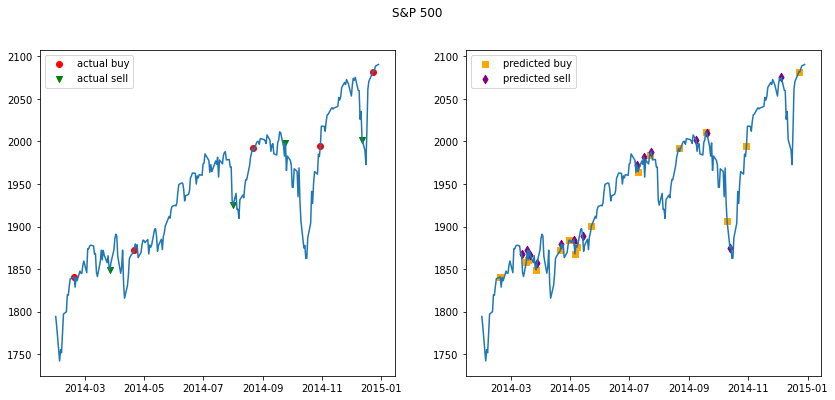

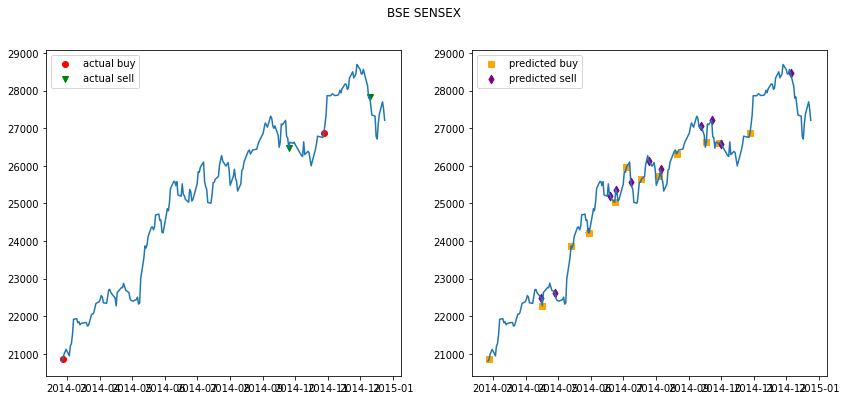

In [15]:
for i in range(len(tickers)):
    dp.plot_signals(dfs_test[i], names[i])

<h3> using best models from profit metrics

In [16]:
models1 = []

best_params_rf1 = [(70, 2, False), (149, 4, True)]
best_params_et1 = [(110, 3, True), (64, 2, True)]
best_params_ab1 = [(81, 'linear'), (81, 'linear')]
best_params_xgb1 = [(81, 2), (81, 2)]

for i in range(len(tickers)):
    model = []
    model.append(Pipeline([('scaler', StandardScaler()), 
                        ('svr', SVR())]))
    model.append(Pipeline([('scaler', StandardScaler()), 
                        ('knn', KNeighborsRegressor())]))

    model.append(RandomForestRegressor(n_estimators=best_params_rf1[i][0],
                                       max_features=best_params_rf1[i][1],
                                    bootstrap=best_params_rf1[i][2],
                                      random_state=42))
    model.append(ExtraTreesRegressor(n_estimators=best_params_et1[i][0],
                                       max_features=best_params_et1[i][1],
                                    bootstrap=best_params_et1[i][2],
                                    random_state=42))
    model.append(AdaBoostRegressor(n_estimators=best_params_ab1[i][0],
                                       loss=best_params_ab1[i][1],
                                  random_state=42))
    model.append(XGBRegressor(n_estimators=best_params_xgb1[i][0],
                                       max_depth=best_params_xgb1[i][1],
                             random_state=42))
    models1.append(model)
    

In [17]:
blenders = get_blender_trained(models1)
otr_preds = get_blender_output(models1, blenders)
#actual_positions, predicted_positions = get_positions_blender(dfs_test, otr_preds)
actual_positions, predicted_positions = dp.get_positions_blender(dfs_test, otr_preds)
print("all 6 models w/ profit-tuned ensemble models")
dp.position_summary(names, actual_positions, predicted_positions, dfs_test, training=False)
actual_profit, predicted_profit = dp.profit_summary(names, dfs_test)
extra_blender = np.sum(np.array(predicted_profit) - np.array(actual_profit))
extra_blender

all 6 models w/ profit-tuned ensemble models
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 37
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 26
Training set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 14.12029338560328
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 29.539068679138538


9.214944560687673

In [18]:
for i in range(2,6):
    pick_n_models(models1, i)

Best combinations of 2  models
models: Extra Trees  Adaboost  
blender: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
11.941165511104398
Best combinations of 3  models
models: SVR  KNN  Random Forest  
blender: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step

In [19]:
best1 = []
for i in range(len(tickers)):
    best1.append([models1[i][0], models1[i][1], models1[i][2], models1[i][5]])
    
blends1 = get_blender_trained(best1, blender_choice=XGBRegressor(random_state=42))
otr_preds1 = get_blender_output(best1, blends1)
errors1 = [mean_squared_error(otr_preds1[i],  y_tests[i]) for i in range(2)]
print("average MSE across all signal predictions:", np.mean(errors1))
      
actual_positions, predicted_positions = dp.get_positions_blender(dfs_test, otr_preds1)
dp.position_summary(names, actual_positions, predicted_positions, dfs_test, training=False)
actual_profit, predicted_profit = dp.profit_summary(names, dfs_test)
np.sum(np.array(predicted_profit) - np.array(actual_profit))

average MSE across all signal predictions: 0.059432494143689354
Test set
S&P 500
number of trading positions taken with actual trend: 9
number of trading positions taken with predicted trend: 41
BSE SENSEX
number of trading positions taken with actual trend: 4
number of trading positions taken with predicted trend: 26
Training set
S&P 500
profit with actual trend: 3.9777336540590267
profit with predicted trend: 18.307665662663823
BSE SENSEX
profit with actual trend: 30.466683849995118
profit with predicted trend: 30.064163266639927


13.927411425249606

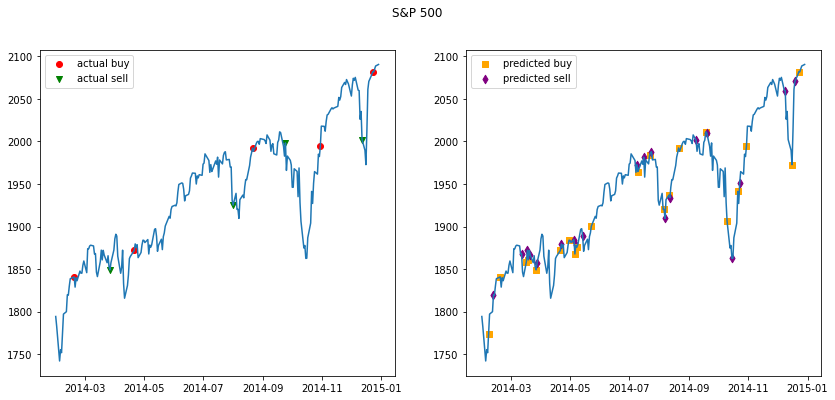

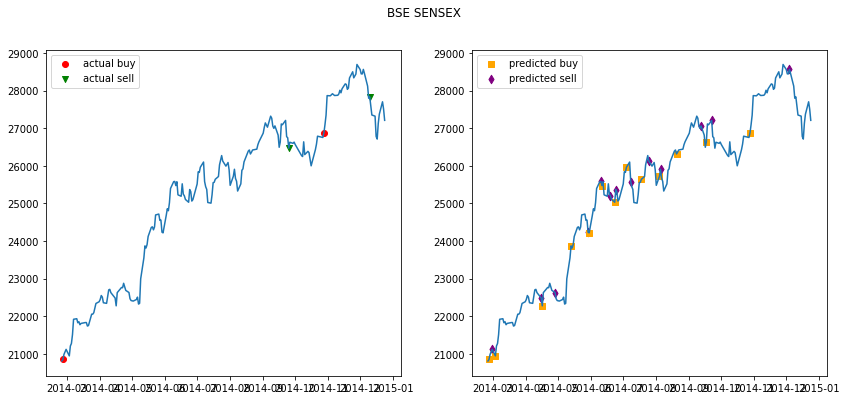

In [20]:
for i in range(len(tickers)):
    dp.plot_signals(dfs_test[i], names[i])

the highest total extra profit achieved by using SVR, KNN, Random Forest, and Gradient Boost as stacking models and gradient boost as the blender.